<a href="https://colab.research.google.com/github/Horax02/Artificial_Vision-Mitnicks/blob/main/Faster_R_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
import tarfile
import os
import cv2
import numpy as np
import tensorflow as tf
from google.protobuf import text_format
from object_detection.protos import string_int_label_map_pb2

# Descargar y extraer el modelo preentrenado
model_url = 'http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz'
model_dir = '/content/Modelo'
model_filename = 'faster_rcnn_resnet50_coco_2018_01_28.tar.gz'

# Descargar el archivo del modelo
urllib.request.urlretrieve(model_url, os.path.join(model_dir, model_filename))

# Extraer el contenido del archivo
tar_file = tarfile.open(os.path.join(model_dir, model_filename))
tar_file.extractall(model_dir)
tar_file.close()

# Rutas a los archivos del modelo
model_name = 'faster_rcnn_resnet50_coco_2018_01_28'
model_path = os.path.join(model_dir, model_name, 'saved_model')

# Cargar el modelo preentrenado
model = tf.saved_model.load(model_path)

# Descargar el archivo de mapeo de etiquetas
label_map_url = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/data/mscoco_label_map.pbtxt'
label_map_path = '/content/Modelo/label_map.pbtxt'

# Descargar el archivo del mapeo de etiquetas
urllib.request.urlretrieve(label_map_url, label_map_path)

# Cargar el archivo de mapeo de etiquetas
label_map = string_int_label_map_pb2.StringIntLabelMap()
with open(label_map_path, 'r') as f:
    text_format.Merge(f.read(), label_map)
categories = label_map.item

# Crear una función de detección de objetos
def detect_objects(image):
    input_tensor = tf.convert_to_tensor(image)
    input_tensor = input_tensor[tf.newaxis, ...]

    # Inferencia del modelo
    model_fn = model.signatures['serving_default']
    output_dict = model_fn(input_tensor)

    num_detections = int(output_dict['num_detections'])
    classes = output_dict['detection_classes'][0].numpy().astype(np.uint8)
    boxes = output_dict['detection_boxes'][0].numpy()
    scores = output_dict['detection_scores'][0].numpy()

    # Filtrar detecciones con puntuación alta
    min_score_thresh = 0.5
    valid_indices = np.where(scores > min_score_thresh)[0]
    boxes = boxes[valid_indices]
    classes = classes[valid_indices]
    scores = scores[valid_indices]

    # Mostrar resultados en la imagen
    for i in range(len(boxes)):
        ymin, xmin, ymax, xmax = boxes[i]
        class_id = int(classes[i])
        class_name = getattr(categories[class_id], 'name')
        score = scores[i]

        # Dibujar la caja delimitadora y el texto de la clase y puntuación
        height, width, _ = image.shape
        (left, right, top, bottom) = (int(xmin * width), int(xmax * width),
                                      int(ymin * height), int(ymax * height))
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(image, f'{class_name} ({score:.2f})', (left, top - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    return image

# Cargar la imagen de prueba
image_path = '/content/image5.jpg'
image = cv2.imread(image_path)

# Realizar la detección de objetos en la imagen
output_image = detect_objects(image)

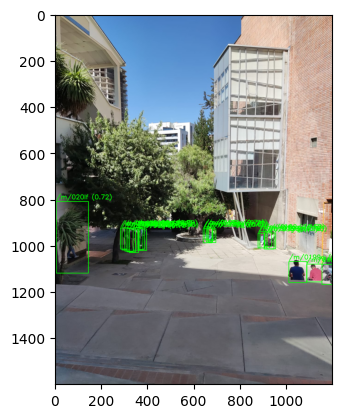

In [ ]:
# Cargar la imagen de prueba
image = cv2.imread('image5.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# Realizar la detección de objetos en la imagen
output_image = detect_objects(image)
# Mostrar la imagen con los objetos detectados
plt.imshow(output_image)

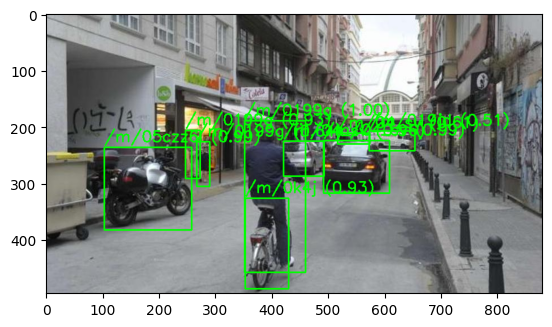

In [ ]:
# Cargar la imagen de prueba
image = cv2.imread('i1.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# Realizar la detección de objetos en la imagen
output_image = detect_objects(image)
# Mostrar la imagen con los objetos detectados
plt.imshow(output_image)

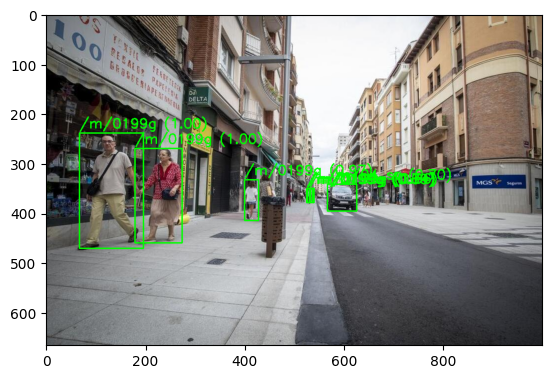

In [ ]:
# Cargar la imagen de prueba
image = cv2.imread('i2.jpeg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# Realizar la detección de objetos en la imagen
output_image = detect_objects(image)
# Mostrar la imagen con los objetos detectados
plt.imshow(output_image)

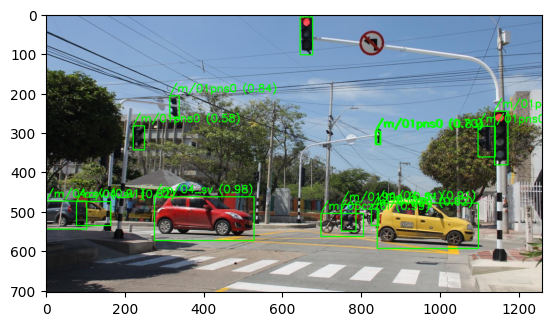

In [ ]:
# Cargar la imagen de prueba
image = cv2.imread('i3.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# Realizar la detección de objetos en la imagen
output_image = detect_objects(image)
# Mostrar la imagen con los objetos detectados
plt.imshow(output_image)